In [4]:
import pandas as pd
# Load self-report data
df_self_reports = pd.read_excel("C:/Users/vyache/Desktop/Questionnaire data_Eng.xlsx")  # Modify filename as needed
df_eng = pd.read_excel("C:/Users/vyache/Downloads/Features_English.xlsx")

# Merge with feature dataset (Ensure the key matches, e.g., 'Recording' and 'Speaker')
df_merged = pd.merge(df_eng, df_self_reports, on=["Recording", "Speaker"])

# Check the merged dataset
print(df_merged.head())

  Speaker   Recording  F0_sma_de_amean_mean  F0_sma_de_skewness_mean  \
0   Rec 1  SPEAKER_00             -0.000116                 0.020218   
1   Rec 1  SPEAKER_01              0.003280                 0.012920   
2   Rec 2  SPEAKER_00             -0.277711                 0.012998   
3   Rec 2  SPEAKER_01             -0.266140                 0.013187   
4   Rec 3  SPEAKER_00             -0.113114                 0.009421   

   pcm_intensity_sma_amean_mean  pcm_intensity_sma_de_amean_mean  \
0                  3.170397e+00                    -3.863621e-05   
1                  3.884405e+00                    -2.706059e+00   
2                  3.927408e+08                    -2.941868e+07   
3                  3.945613e+09                    -2.819273e+06   
4                  3.934634e+09                    -1.422580e+07   

   pcm_loudness_sma_amean_mean  pcm_loudness_sma_de_amean_mean  \
0                     0.853286                   -3.711688e+01   
1                     0.85

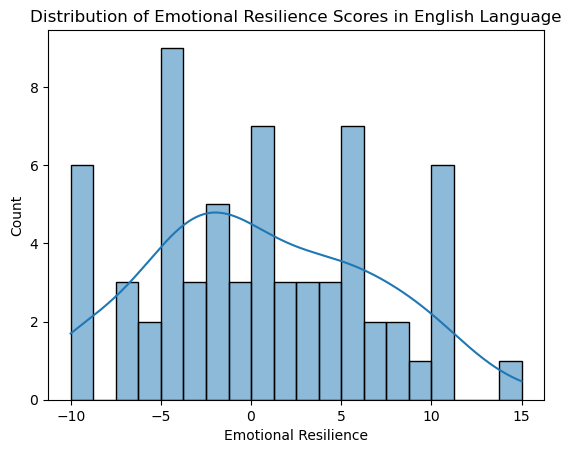

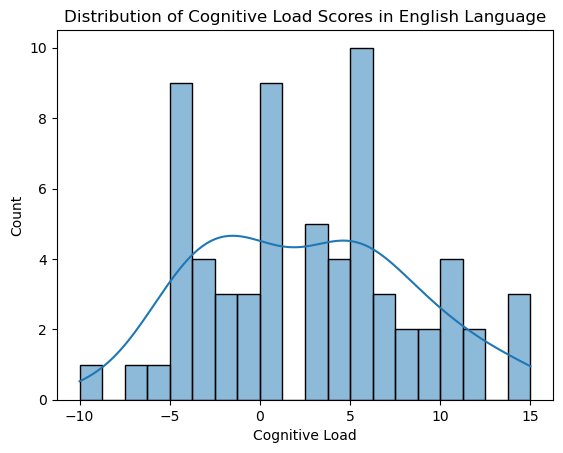

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Emotional Resilience Scores
sns.histplot(df_self_reports["Emotional Resilience"], kde=True, bins=20)
plt.title("Distribution of Emotional Resilience Scores in English Language")
plt.show()

# Plot Cognitive Load Scores
sns.histplot(df_self_reports["Cognitive Load"], kde=True, bins=20)
plt.title("Distribution of Cognitive Load Scores in English Language")
plt.show()


In [8]:
# Compute median thresholds
resilience_threshold = df_merged["Emotional Resilience"].median()
cognitive_load_threshold = df_merged["Cognitive Load"].median()

# Create binary labels
df_merged["high_resilience"] = (df_merged["Emotional Resilience"] >= resilience_threshold).astype(int)
df_merged["high_cognitive_load"] = (df_merged["Cognitive Load"] >= cognitive_load_threshold).astype(int)

print(df_merged[["Emotional Resilience", "high_resilience"]].head())
print(df_merged[["Cognitive Load", "high_cognitive_load"]].head())


   Emotional Resilience  high_resilience
0                    -3                0
1                     4                1
2                    15                1
3                     5                1
4                     0                1
   Cognitive Load  high_cognitive_load
0               5                    1
1               0                    0
2             -10                    0
3               0                    0
4               4                    1


In [10]:
# Define percentiles
low_threshold_resilience = df_self_reports["Emotional Resilience"].quantile(0.33)
high_threshold_resilience = df_self_reports["Emotional Resilience"].quantile(0.66)

low_threshold_load = df_self_reports["Cognitive Load"].quantile(0.33)
high_threshold_load = df_self_reports["Cognitive Load"].quantile(0.66)

# Categorize into 0 (Low), 1 (Medium), 2 (High)
def categorize_resilience(score):
    if score < low_threshold_resilience:
        return 0  # Low

    else:
        return 2  # High

def categorize_cognitive_load(score):
    if score < low_threshold_load:
        return 0  # Low
    else:
        return 2  # High

df_self_reports["resilience_category"] = df_self_reports["Emotional Resilience"].apply(categorize_resilience)
df_self_reports["cognitive_load_category"] = df_self_reports["Cognitive Load"].apply(categorize_cognitive_load)

print(df_self_reports["resilience_category"].value_counts())
print(df_self_reports["cognitive_load_category"].value_counts())



resilience_category
2    46
0    20
Name: count, dtype: int64
cognitive_load_category
2    44
0    22
Name: count, dtype: int64
